<a href="http://lnls.cnpem.br/"><img src="http://fig.if.usp.br/~biofisic/images/logo_lnls.jpg" style="width:90px; float: left;"></a><h1>Validation of PID for the CAENels by Ziegler-Nichols method </h1>


#### _by Lucas Balthazar_

Testing of Ziegler-Nichols methods for CAENels PS:
- L = dead time;
- T = rise time;
> Steps:
   - Select the open mesh;
   - Apply instantly steps;
   - Strorage the react curve;
   - Calculate L and T constants;

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to turn on / off the source code"></form>''')

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#Jupyter widgets
import ipywidgets as widgets
from IPython.display import display # Used to display widgets in the notebook

In [4]:
# Modifying the plot style
style.use('fivethirtyeight')

<img src="http://virtual.cvut.cz/course/syscontrol/img1242.gif" style="width:500px; float: center;">

In [5]:
#Create dataset
Geral = {'Ki': ['0','L/0.3','2*L'],
           'Kd': ['0','0','0.5*L'],
           'Kp': ['T/L','0.9*T/L','1.2*T/L'],
            ' ': ['P','PI','PID']}

In [6]:
geral_pd = pd.DataFrame(Geral)
geral_pd

,,Kd,Ki,Kp
0,P,0,0,T/L
1,PI,0,L/0.3,0.9*T/L
2,PID,0.5*L,2*L,1.2*T/L


### Simulation with arbitray values for L and T

In [7]:
#Create a train set for T and L
L_= np.array([0.01, 0.02, 0.03, 0.04]) # Four possibilities for L
T_= 4*L_                               # Approximately 4 times L
Kp_p = np.zeros([len(L_)])
T_L = np.array([])
values = 0

for i in range (len(L_)):
    values = T_[i]/L_[i]
    T_L = np.append(T_L, values)


In [8]:
# For PI configuration
kp_pi = np.array([])
ki_pi = np.array([])
for i in range(len(T_L)):
    ki_pi =np.append(ki_pi,L_[i]/0.3)
    kp_pi = np.append(kp_pi,0.9*T_L[i])

# For PID configuration 
kp_pid = np.array([])
ki_pid = np.array([])
kd_pid = np.array([]) 
for i in range(len(T_L)):
    kd_pid = np.append(kd_pid,0.5*L_[i])
    ki_pid = np.append(ki_pid,2*L_[i])
    kp_pid = np.append(kp_pid,1.2*T_L[i])
    

In [9]:
#PI series
kp_pi_ser = pd.Series(kp_pi)
ki_pi_ser = pd.Series(ki_pi)

In [10]:
#PID series
kp_pid_ser = pd.Series(kp_pid)
ki_pid_ser = pd.Series(ki_pid)
kd_pid_ser = pd.Series(kd_pid)

### PI configuration for arbitrary values to L and T 

In [11]:
DFpi = {'Kp' : kp_pi_ser,
       'Ki' : ki_pi_ser}
DF_pi = pd.DataFrame(DFpi)
DF_pi

,Ki,Kp
0,0.033333,3.6
1,0.066667,3.6
2,0.100000,3.6
3,0.133333,3.6


### PID configuration for arbitrary values to L and T 

In [12]:
DFpid = {'Kp' : kp_pid_ser,
        'Ki' : ki_pi_ser,
        'Kd' : kd_pid_ser}
DF_pid = pd.DataFrame(DFpid)
DF_pid

,Kd,Ki,Kp
0,0.005,0.033333,4.8
1,0.010,0.066667,4.8
2,0.015,0.100000,4.8
3,0.020,0.133333,4.8


## Using single (experimental) data with ipywidgets

> To properly run widget in Jupyter Notebook, execute the command: 
    - jupyter nbextension enable --py widgetsnbextension --sys-prefix


In [13]:
#Create the FloatText widget
T = widgets.FloatText(
    description='Rise time constant T=',
    disabled=False,
    color='blue')

L = widgets.FloatText(
    description='Dead time L=',
    disabled=False,
    color='blue')

In [16]:
Cont0 = widgets.HBox(children=[T,L])
Cont0

In [17]:
TL = T.value/L.value
TL

3.2199999999999998

In [18]:
#For PI
kp_pi_2 = 0.9*TL 
ki_pi_2 = L.value/0.3

#For PID
kp_pid_2 =1.2*TL
ki_pid_2 =2*L.value
kd_pid_2 =0.5*L.value

In [19]:
NewTable = {  'Ki': ['0',ki_pi_2,ki_pid_2],
           'Kd': ['0','0',kd_pid_2],
           'Kp': [TL,kp_pi_2,kp_pid_2],
            ' ': ['P','PI','PID']}
pd.DataFrame(NewTable)

,,Kd,Ki,Kp
0,P,0,0,3.220
1,PI,0,0.001533333,2.898
2,PID,0.00023,0.00092,3.864


## Load file from Oscilloscope and Analytics before PID adjust

In [20]:
# Load rise time file
rise_df = pd.read_csv('D:/ARQ/Lucas/Power-Supply-CAENels-FAST-PS-1020-200-library/Data CANEels from Oscilloscope/rise_time_0_10v.csv')

In [21]:
# Visualize rise file
rise_df

,x-axis,1
0,second,Volt
1,+61.000000E-03,-6.680592E-03
2,+61.005000E-03,-251.572E-06
3,+61.010000E-03,-301.823E-06
4,+61.015000E-03,-97.677E-06
5,+61.020000E-03,-6.831345E-03
6,+61.025000E-03,-5.977074E-03
7,+61.030000E-03,-402.325E-06
8,+61.035000E-03,+4.374685E-03
9,+61.040000E-03,+2.964509E-03


In [22]:
main_rise = rise_df.loc[201:1600, 'x-axis':'1']

In [23]:
x = pd.Series(main_rise.iloc[:,0], dtype=float)

In [24]:
y = pd.Series(main_rise.iloc[:,1], dtype=float)

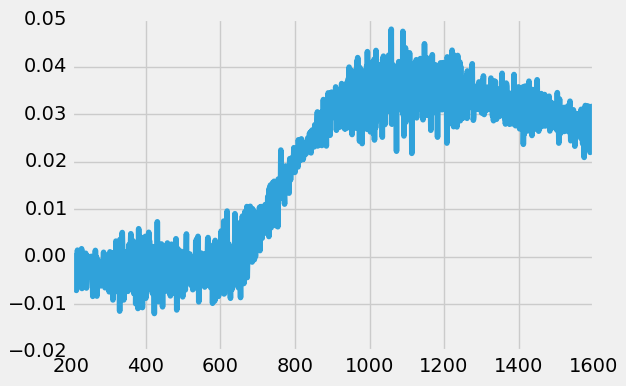

In [25]:
y.plot()

## Fit polynomial curve for react curve

In [26]:
x_axis = np.linspace(1,1400,1400)
vector = np.asarray(y, dtype=float)
poly = np.polyfit(x_axis,vector,10)
ploy1d = np.poly1d(poly)
print(ploy1d)

            10            9             8             7             6
-1.572e-29 x  + 1.08e-25 x - 3.112e-22 x + 4.868e-19 x - 4.457e-16 x
            5            4             3             2
 + 2.4e-13 x - 7.24e-11 x + 1.101e-08 x - 6.358e-07 x - 3.347e-06 x - 0.002114


In [27]:
poly_fit_graph = []
for i in range(len(x_axis)):   
    num = ploy1d(i)
    poly_fit_graph.append(float(num))
#plt.plot(poly_fit_graph)

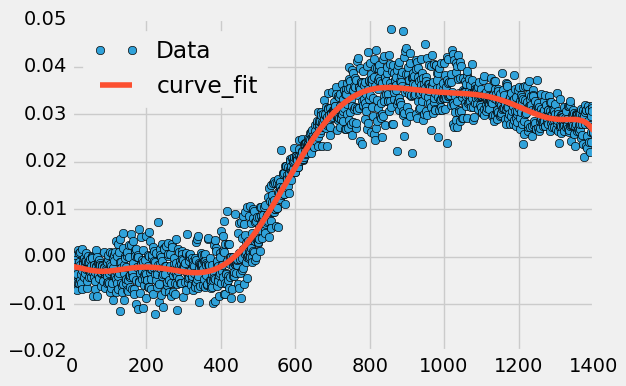

In [28]:
plt.plot(x_axis,vector,'o', x_axis ,poly_fit_graph,'-')
plt.legend(['Data','curve_fit'], loc='best')

In [29]:
inclination_rise = rise_df.loc[600:1000, 'x-axis':'1']

In [30]:
y_incl = pd.Series(inclination_rise.iloc[:,1], dtype=float)

In [31]:
y_incl

600   -0.002211
601   -0.005575
602    0.005377
603   -0.003012
604   -0.001709
605    0.004372
606   -0.004272
607    0.001256
608    0.001005
609    0.007487
610   -0.007887
611   -0.007789
612    0.002663
613   -0.005525
614   -0.003417
...
986     0.029045
987     0.036834
988     0.032365
989     0.034221
990     0.031510
991     0.030653
992     0.040204
993     0.026837
994     0.043216
995     0.035279
996     0.028140
997     0.036934
998     0.033319
999     0.037289
1000    0.033970
Name: 1, Length: 401, dtype: float64

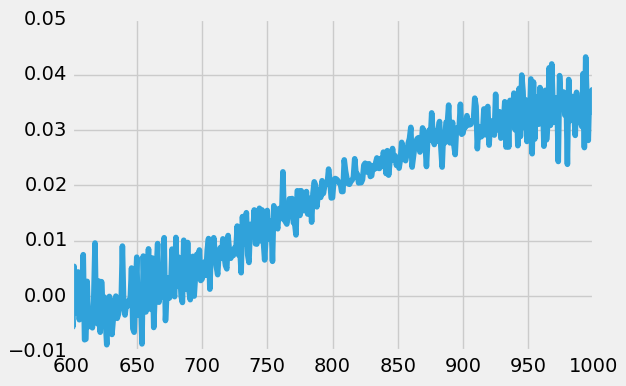

In [32]:
y_incl.plot()

In [33]:
x_axis_2 = np.linspace(1,401,401)
vector = np.asarray(y_incl, dtype=float)
poly2 = np.polyfit(x_axis_2,vector,1)
ploy1d2 = np.poly1d(poly2)
print(ploy1d2)

 
0.0001083 x - 0.003888


In [34]:
poly_fit_graph_2 = []
for i in range(len(x_axis_2)):   
    num1 = ploy1d2(i)
    poly_fit_graph_2.append(float(num1))
#plt.plot(poly_fit_graph_2)

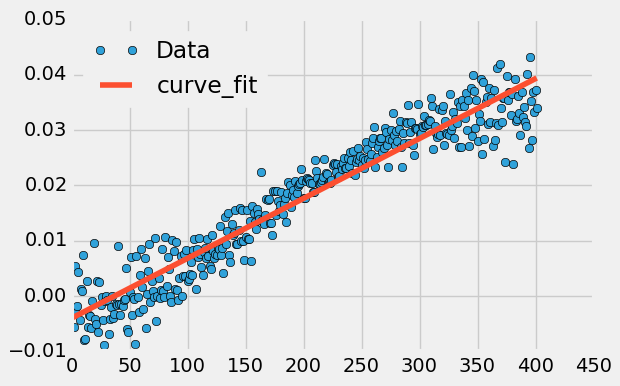

In [35]:
plt.plot(x_axis_2,vector,'o', x_axis_2 ,poly_fit_graph_2,'-')
plt.legend(['Data','curve_fit'], loc='best')

In [36]:
fitderive = ploy1d2.deriv()
fitderive

poly1d([ 0.00010826])

## Load file from Oscilloscope and Analytics <b>after</b> PID adjust

In [37]:
adj_df = pd.read_csv('D:/ARQ/Lucas/Power-Supply-CAENels-FAST-PS-1020-200-library/Data CANEels from Oscilloscope/adjust_rise.csv')

In [38]:
adj_df

,x-axis,1
0,second,Volt
1,+38.186000E-03,NaN
2,+38.187000E-03,NaN
3,+38.188000E-03,+201.038E-06
4,+38.189000E-03,-18.811E-06
5,+38.190000E-03,-579.427E-06
6,+38.191000E-03,-1.075658E-03
7,+38.192000E-03,-1.289226E-03
8,+38.193000E-03,-1.268811E-03
9,+38.194000E-03,-1.369314E-03


In [39]:
adj_rise = adj_df.loc[900:1200, 'x-axis':'1']

In [40]:
y_adj = pd.Series(adj_rise.iloc[:,1], dtype=float)

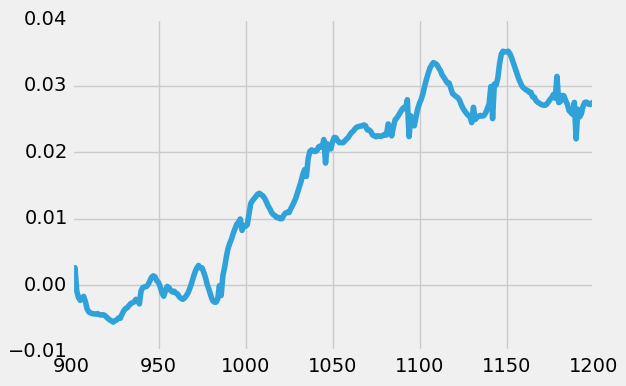

In [41]:
y_adj.plot()

In [42]:
x_adj = np.linspace(1,301,301)
vct_adj = np.asarray(y_adj, dtype=float)
poly_adj = np.polyfit(x_adj,vct_adj,1)
poly1d_adj = np.poly1d(poly_adj)
print(poly1d_adj)

 
0.000139 x - 0.005152


In [43]:
poly_fit_adj = []
for i in range(len(x_adj)):   
    num2 = poly1d_adj(i)
    poly_fit_adj.append(float(num2))
#plt.plot(poly_fit_graph_2)

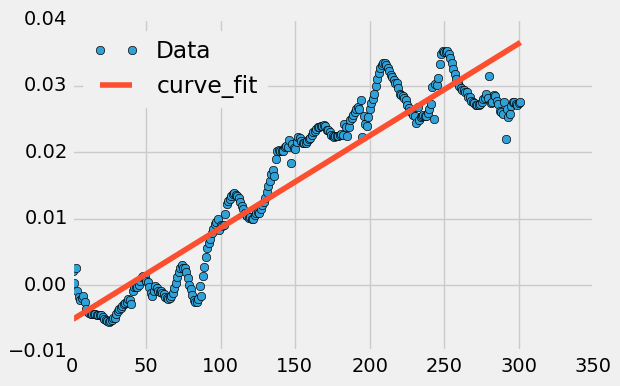

In [44]:
plt.plot(x_adj,vct_adj,'o', x_adj ,poly_fit_adj,'-')
plt.legend(['Data','curve_fit'], loc='best')

In [45]:
fitderive_adj = poly1d_adj.deriv()
fitderive_adj

poly1d([ 0.00013897])